In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARMA
path = "C:/Users/HP/Desktop/corona1.csv"
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

dateparse = lambda dates : pd.datetime.strptime(dates, '%m/%d/%Y')
data = pd.read_csv(path, parse_dates =['Month'],index_col = 'Month',date_parser = dateparse)


In [3]:
data.head(80)
               

,Daily case
Month,
2020-03-10,2.0
2020-03-11,2.0
2020-03-12,2.0
2020-03-13,2.0
2020-03-14,2.0
2020-03-15,2.0
2020-03-16,2.0
2020-03-17,2.0
2020-03-18,3.0


In [4]:
type(data['Daily case'])

pandas.core.series.Series

In [5]:
data['Daily case'] = data['Daily case'].astype(int)

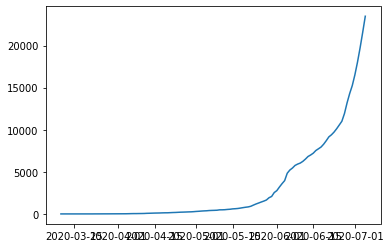

In [6]:
plt.plot(data)

In [7]:
ts = data['Daily case']

In [8]:
ts

Month
2020-03-10        2
2020-03-11        2
2020-03-12        2
2020-03-13        2
2020-03-14        2
2020-03-15        2
2020-03-16        2
2020-03-17        2
2020-03-18        3
2020-03-19        3
2020-03-20        3
2020-03-21        3
2020-03-22        3
2020-03-23        6
2020-03-24        6
2020-03-25        7
2020-03-26        9
2020-03-27       10
2020-03-28       10
2020-03-29       12
2020-03-30       14
2020-03-31       15
2020-04-01       16
2020-04-02       17
2020-04-03       19
2020-04-04       20
2020-04-05       27
2020-04-06       35
2020-04-07       41
2020-04-08       41
              ...  
2020-06-06     5211
2020-06-07     5450
2020-06-08     5758
2020-06-09     5919
2020-06-10     6039
2020-06-11     6243
2020-06-12     6514
2020-06-13     6821
2020-06-14     7000
2020-06-15     7213
2020-06-16     7530
2020-06-17     7734
2020-06-18     7944
2020-06-19     8281
2020-06-20     8697
2020-06-21     9150
2020-06-22     9399
2020-06-23     9721
2020-06-24    

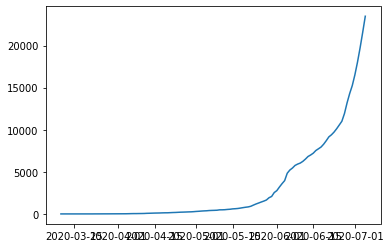

In [9]:
plt.plot(ts)


In [10]:
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(window = 12).mean()
    rolstd = timeseries.rolling(window = 12).std()
    orig = plt.plot(timeseries, color = "blue", label = "original")
    mean = plt.plot(rolmean, color = "red", label = "rolling mean")
    std = plt.plot(rolstd, color = 'black', label = "Rolling std")
    plt.legend(loc = 'best')
    plt.title("Rolling mean and standard deviation")
    plt.show(block = False)
    print("Results of dickey-fuller test :")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic','P-value','#Lags used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)  

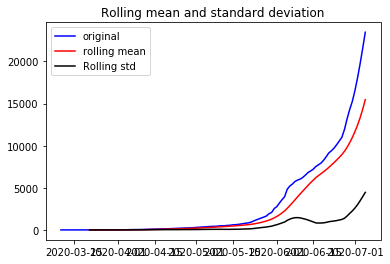

Results of dickey-fuller test :
Test Statistic                   3.970279
P-value                          1.000000
#Lags used                      10.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64


In [11]:
test_stationarity(ts)


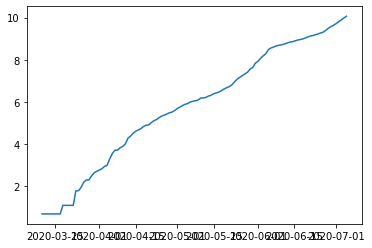

In [12]:
ts_log= np.log(ts)
plt.plot(ts_log)


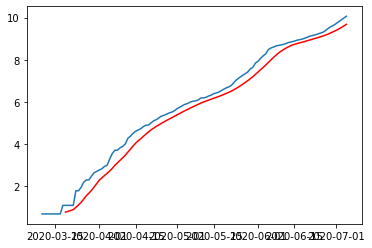

In [13]:
moving_avg = ts_log.rolling(window=10).mean()
plt.plot(ts_log)
plt.plot(moving_avg,color="red")

In [14]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(15)

Month
2020-03-10         NaN
2020-03-11         NaN
2020-03-12         NaN
2020-03-13         NaN
2020-03-14         NaN
2020-03-15         NaN
2020-03-16         NaN
2020-03-17         NaN
2020-03-18         NaN
2020-03-19    0.324372
2020-03-20    0.283826
2020-03-21    0.243279
2020-03-22    0.202733
2020-03-23    0.786019
2020-03-24    0.676157
Name: Daily case, dtype: float64

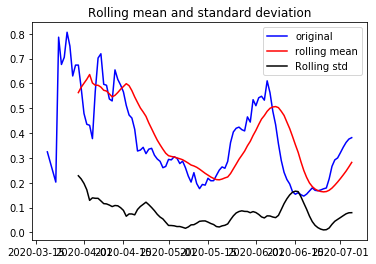

Results of dickey-fuller test :
Test Statistic                 -2.339060
P-value                         0.159680
#Lags used                     13.000000
Number of Observations Used    95.000000
Critical Value (1%)            -3.501137
Critical Value (5%)            -2.892480
Critical Value (10%)           -2.583275
dtype: float64


In [15]:
ts_log_moving_avg_diff.dropna(inplace = True)
test_stationarity(ts_log_moving_avg_diff)

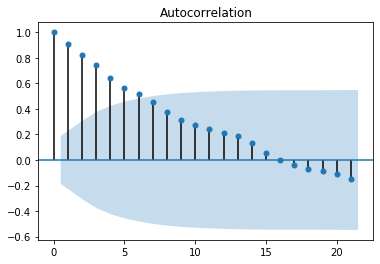

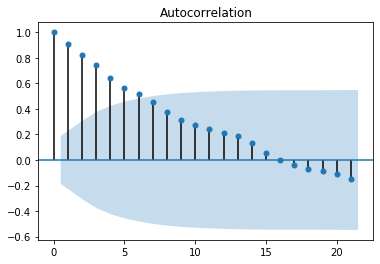

In [16]:
plot_acf(ts_log_moving_avg_diff)

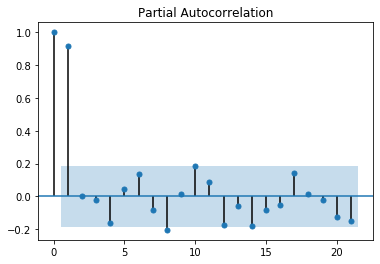

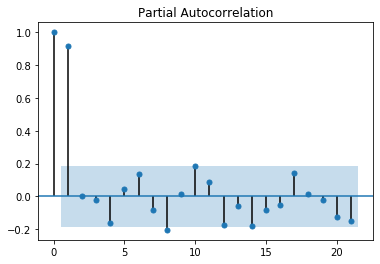

In [17]:
plot_pacf(ts_log_moving_avg_diff)

c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 0.5653')

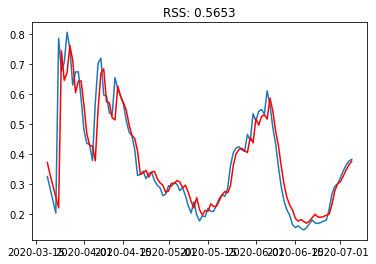

In [18]:
model = ARMA(ts_log_moving_avg_diff, order=(1,0))  
results_ARMA = model.fit(disp=-1)  
plt.plot(ts_log_moving_avg_diff)
plt.plot(results_ARMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARMA.fittedvalues-ts_log_moving_avg_diff)**2))

In [19]:
results_ARMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             Daily case   No. Observations:                  109
Model:                     ARMA(1, 0)   Log Likelihood                 131.448
Method:                       css-mle   S.D. of innovations              0.072
Date:                Mon, 13 Jul 2020   AIC                           -256.895
Time:                        21:56:50   BIC                           -248.821
Sample:                    03-19-2020   HQIC                          -253.621
                         - 07-05-2020                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3711      0.063      5.860      0.000       0.247       0.495
ar.L1.Daily case     0.8992      0.039     23.095      0.000       0.823       0.975
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1121           +0.0000j            1.1121            0.0000
-----------------------------------------------------------------------------
"""

In [20]:
predictions_ARMA_diff = pd.Series(results_ARMA.fittedvalues)
print (predictions_ARMA_diff.head())

Month
2020-03-19    0.371094
2020-03-20    0.329083
2020-03-21    0.292625
2020-03-22    0.256167
2020-03-23    0.219708
dtype: float64


In [21]:
predictions_ARMA_log = predictions_ARMA_diff.add(moving_avg)

In [25]:
predictions_ARMA_log.dropna()

Text(0.5, 1.0, 'RMSE: nan')

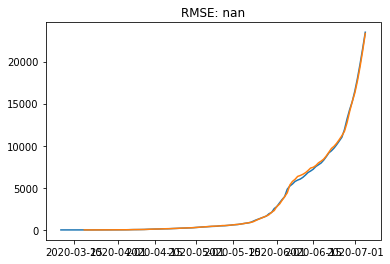

In [23]:
predictions_ARMA = np.exp(predictions_ARMA_log)
plt.plot(ts)
plt.plot(predictions_ARMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARMA-ts)**2)/len(ts)))

In [26]:
print(predictions_ARMA)

Month
2020-03-10             NaN
2020-03-11             NaN
2020-03-12             NaN
2020-03-13             NaN
2020-03-14             NaN
2020-03-15             NaN
2020-03-16             NaN
2020-03-17             NaN
2020-03-18             NaN
2020-03-19        3.143493
2020-03-20        3.138892
2020-03-21        3.151751
2020-03-22        3.164662
2020-03-23        3.405696
2020-03-24        6.422350
2020-03-25        6.594767
2020-03-26        7.866767
2020-03-27       10.118073
2020-03-28       10.856258
2020-03-29       11.191040
2020-03-30       13.577915
2020-03-31       15.950399
2020-04-01       17.360577
2020-04-02       17.564143
2020-04-03       18.953618
2020-04-04       20.975232
2020-04-05       22.307614
2020-04-06       30.002045
2020-04-07       38.980609
2020-04-08       44.760650
                  ...     
2020-06-06     5334.645860
2020-06-07     5758.214306
2020-06-08     6009.560622
2020-06-09     6354.002365
2020-06-10     6464.438871
2020-06-11     6604.26